# **AKADEMI EDUCATION – First Cohort  (2025): Data Science & AI**
#### *2nd Project: Scientific Computing & Quantitative Methods - Phase 2*

**Student name: Riché FLEURINORD**   
**Student pace: self paced**  
**Deadline Submission: July 20, 2025**  
**Instructors' Names: Wedter JEROME & Geovany Batista Polo LAGUERRE**  
**Blog post URL (GitHub Repository Link): https://github.com/richefleuriord/Ds_movie-analytics.git**

# **Project Title**

**Data-Driven Insights for a Successful Movie Studio: Analyzing Key Box Office Drivers**

![Bannière aviation](images/image4.jpeg)

# *Overview*

*This data science project analyzes movie industry datasets from Box Office Mojo and IMDB to support strategic decision-making for a new movie studio. Through data cleaning, exploration, visualization, and statistical reasoning, the goal is to identify the key factors driving box office success. The project aims to generate actionable insights for business stakeholders to guide future investments in film production. Key areas of focus include genre performance, audience ratings, and movie characteristics associated with higher revenues.*

# *Business Problem*

![Bannière aviation](images/image5.jpeg)

To support a strategic investment in the entertainment industry, this project focuses on analyzing historical box office data to identify the types of films most likely to succeed commercially. With the rise of companies creating their own original video content, our fictional company is planning to launch a new movie studio but lacks experience in the movie production sector.

This analysis is designed to answer a key business question: What types of films tend to perform best at the box office?
Through a data-driven approach, the objective is to generate clear and actionable insights to guide strategic decisions on the genres, characteristics, and profiles of films the company should prioritize to maximize revenue potential.

The final recommendations will help business stakeholders make informed decisions to reduce financial risks and increase the likelihood of success in this highly competitive industry.

# *1-Data Understanding*

The datasets used in this project mainly come from IMDB (SQLite database) and The Numbers, providing essential complementary information to analyze film box office performance and identify key success factors in the film industry.

A - IMDB (im.db - SQLite database)

This relational database offers a vast amount of metadata on films. For this project, the following tables are particularly relevant:

- movie_basics: titles, genres, runtimes, and release years

- movie_ratings: user ratings and number of votes

These data help capture audience preferences as well as the general characteristics of successful films.

B - The Numbers (tm.movie_budgets.csv.gz)

This dataset provides crucial information on production budgets and film revenues, notably:

- production budgets

- opening weekend revenues

- total domestic and worldwide revenues

Integrating this dataset strengthens the analysis by allowing comparison between budget, commercial performance, and profitability.

**Objectives of this stage**

The main objectives of this data understanding phase are:

- Explore the structure of each dataset (formats, tables, variables)

- Identify key variables for analysis (genres, ratings, revenues, budgets, etc.)

- Detect missing or inconsistent data and plan appropriate cleaning steps

- Build a clear and robust understanding of the data to guide exploratory analysis and formulate operational recommendations

![Bannière aviation](images/image6.jpeg)

## **1.1 Importing the necessary libraries**

In [2]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import statsmodels.api as sm
import re
import warnings
warnings.filterwarnings('ignore')

## **1.2 Connect to the Database**

In [3]:
conn = sqlite3.connect('data/im.db')

## **1.3 tables in the database**

In [4]:
df = pd.read_sql(
    """
    SELECT *
    FROM sqlite_master
    """
, conn
)

df[df['type'] == 'table']


,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## **1.4 Loading the dataset**

In [5]:
df2 = pd.read_csv("data/tn.movie_budgets.csv.gz", encoding= "ISO-8859-1", low_memory=False)

## **1.5 Overview of the df2 dataset**

In [6]:
df2.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At WorldÃ¢ÂÂs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [7]:
df2.shape

(5782, 6)

In [8]:
df2.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
df2.isnull().sum().sort_values(ascending=False)

worldwide_gross      0
domestic_gross       0
production_budget    0
movie                0
release_date         0
id                   0
dtype: int64

In [11]:
df2.duplicated().sum()

0

The df2 dataset contains financial information on 5,782 films, organized into six columns. Each entry corresponds to a unique film, identified by an id, along with its release date, title (movie), and three key financial variables: production_budget, domestic_gross, and worldwide_gross. All columns are complete, with no missing values, although the financial columns are currently of object type due to their monetary formatting. This dataset serves as a valuable foundation for analyzing film profitability and exploring the relationships between budget and generated revenues.

## **1.6 Overview of the "im.db"database**

![Bannière aviation](images/image7.jpeg)

### **1.7 working with movie_basics table.**

In [12]:
q1 = """SELECT * FROM 
movie_basics;"""

df3 = pd.read_sql(q1,conn)

In [13]:
df3.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
df3.shape

(146144, 6)

In [15]:
df3.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
df3.duplicated().sum()

0

In [18]:
df3.isnull().sum().sort_values(ascending=False)

runtime_minutes    31739
genres              5408
original_title        21
start_year             0
primary_title          0
movie_id               0
dtype: int64

In [19]:
missing_pct = df3.isnull().mean().sort_values(ascending=False) * 100
missing_pct.head(6)

runtime_minutes    21.717621
genres              3.700460
original_title      0.014369
start_year          0.000000
primary_title       0.000000
movie_id            0.000000
dtype: float64

The movie_basics table from the IMDB database provides fundamental information about a large number of movies, totaling 146,144 entries and 6 columns. The key variables include the movie’s unique identifier (movie_id), its primary_title and original_title, start_year, runtime_minutes, and genres.

An initial analysis reveals the following:

- Missing Data:

   - runtime_minutes has approximately 21.7% missing values,

   - genres has around 3.7% missing values,

   - original_title contains very few missing values (0.01%).

- Data Types: The columns include text (object), numerical (integer, float), and categorical data.

- Duplicates: No duplicated rows were identified in the dataset.

This exploratory step helps confirm the structure and completeness of the data, highlighting potential areas where cleaning or imputation may be necessary for accurate analysis in the next steps.

# **1.8 working with movie_ratings table.**

In [20]:
q2 = """SELECT * FROM 
movie_ratings;"""

df4 = pd.read_sql(q2,conn)

In [21]:
df4.head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [22]:
df4.shape

(73856, 3)

In [23]:
df4.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [25]:
df4.duplicated().sum()

0

In [26]:
df4.isnull().sum().sort_values(ascending=False)

numvotes         0
averagerating    0
movie_id         0
dtype: int64

The movie_ratings dataset provides key information about the popularity and perceived quality of movies through two main variables: average rating (averagerating) and number of votes (numvotes). It contains 73,856 rows and 3 columns: movie_id, averagerating, and numvotes.

After verification, there are no missing values or duplicates in this dataset. The numerical columns are correctly typed (float64 for the average rating and int64 for the number of votes), making this dataset clean and ready for analysis. This data will be particularly valuable for enhancing further analyses related to movie performance.

# *2-Data Preparation*

## *2.1 Working with the df2 dataset*

## **2.1.1 Cleaning of Financial Data**

In [27]:
cols_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_clean:
    df2[col] = df2[col].replace('[\$,]', '', regex=True).astype(float)

## **2.1.2 Conversion of Release Date**

In [28]:
df2['release_date'] = pd.to_datetime(df2['release_date'])

## **2.1.3 Creation of Useful Variables**

In [29]:
df2['profit'] = df2['worldwide_gross'] - df2['production_budget']
df2['release_year'] = df2['release_date'].dt.year

In [30]:
df2['foreign_gross'] = df2['worldwide_gross'] - df2['domestic_gross']

In [31]:
df2.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_year,foreign_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2009,2.015838e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,8.046000e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,2019,1.070000e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,2015,9.440081e+08
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,2017,6.965404e+08


In [32]:
df2.duplicated().sum() 

0

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   profit             5782 non-null   float64       
 7   release_year       5782 non-null   int64         
 8   foreign_gross      5782 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 406.7+ KB


The data preparation step for the df2 dataset helped structure the information in a way that is usable for analysis. Financial data was cleaned by removing currency symbols and converting the values into a numeric format. The release date variable was transformed into datetime format, making it easier to extract temporal information such as the release year. In addition, derived variables such as profit and release_year were created to enrich the analysis. A check for row uniqueness confirmed the absence of duplicates, and an inspection of variable types and completeness validated the overall quality of the dataset. This clean and structured foundation now serves as a solid base for the next steps of exploratory analysis and modeling.

## *2.2 Working with the df3 dataset*

## **2.2.1 Cleaning of invalid values in categorical variables**

In [34]:
categorical_cols = ['genres','original_title']


invalid_values = ['Unknown', 'Unavailable', 'None', 'UNK', 'unknown', 'ANAVAILABLE', 'NONE', 'none',\
                 'unk', 'n/a', 'N/A', 'Unk', 'UNKNOWN','']

for col in categorical_cols:
    mode = df3[col].mode()[0]
    df3[col] = df3[col].replace(invalid_values, np.nan)
    df3[col].fillna(mode, inplace=True) 

In [35]:
df3.isnull().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes    31739
genres                 0
dtype: int64

## **2.2.2 Imputation of missing values for numerical variable**

In [36]:
df3['runtime_minutes'] = df3.groupby('genres')['runtime_minutes'].transform(lambda x: x.fillna(x.median()))

In [37]:
df3['runtime_minutes'] = df3['runtime_minutes'].fillna(df3['runtime_minutes'].median())

In [38]:
df3.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

The runtime_minutes column contained approximately 21.7% missing values. Since runtime is a critical attribute for understanding movie characteristics, we decided not to drop this column. Instead, we applied an imputation strategy by replacing missing values with the median runtime within each genre category. This ensures that the imputed values remain representative of the typical movie length for each genre.

For genres where the median could not be calculated (due to all values being missing), we used the global median of the runtime_minutes column as a fallback. After this process, there are no missing values remaining in the dataset for this variable.

## *2.3 Working with the df4 dataset*

In [39]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [40]:
df4.duplicated().sum()

0

In [41]:
df4.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [42]:
df4.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## *2.4 Final merging of the datasets*

In [43]:

def normalize_title(title):
    if pd.isna(title):
        return ""  
    title = title.lower()                    
    title = re.sub(r'[^\w\s]', '', title)    
    title = re.sub(r'\s+', ' ', title)       
    title = title.strip()                    
    return title

df2['movie_norm'] = df2['movie'].apply(normalize_title)
df3['primary_title_norm'] = df3['primary_title'].apply(normalize_title)

In [44]:
df_merged = pd.merge(df2, df3,
                     left_on='movie_norm',
                     right_on='primary_title_norm',
                     how='inner',   
                     suffixes=('_df2', '_3'))

print(f"Number of films after merging df1 and movie_basics: {df_merged.shape[0]}")

Number of films after merging df1 and movie_basics: 4002


In [45]:
final_df = pd.merge(df_merged, df4,
                    left_on='movie_id',
                    right_on='movie_id',
                    how='inner')  

print(f"Number of films after merging with movie_ratings: {final_df.shape[0]}")

Number of films after merging with movie_ratings: 3006


In [46]:
final_df.isnull().sum().sort_values(ascending=False)

numvotes              0
foreign_gross         0
release_date          0
movie                 0
production_budget     0
domestic_gross        0
worldwide_gross       0
profit                0
release_year          0
movie_norm            0
averagerating         0
movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                0
primary_title_norm    0
id                    0
dtype: int64

In [47]:
final_df.shape

(3006, 19)

In [48]:
final_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'profit', 'release_year', 'foreign_gross',
       'movie_norm', 'movie_id', 'primary_title', 'original_title',
       'start_year', 'runtime_minutes', 'genres', 'primary_title_norm',
       'averagerating', 'numvotes'],
      dtype='object')

In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 0 to 3005
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  3006 non-null   int64         
 1   release_date        3006 non-null   datetime64[ns]
 2   movie               3006 non-null   object        
 3   production_budget   3006 non-null   float64       
 4   domestic_gross      3006 non-null   float64       
 5   worldwide_gross     3006 non-null   float64       
 6   profit              3006 non-null   float64       
 7   release_year        3006 non-null   int64         
 8   foreign_gross       3006 non-null   float64       
 9   movie_norm          3006 non-null   object        
 10  movie_id            3006 non-null   object        
 11  primary_title       3006 non-null   object        
 12  original_title      3006 non-null   object        
 13  start_year          3006 non-null   int64       

The final merging process consolidated critical data from multiple sources into a single, unified dataset. We first normalized movie titles to address inconsistencies in formatting across datasets. Then, we performed an inner join between the financial dataset from The Numbers (df2) and the IMDB movie metadata (df3), using normalized movie titles as the linking key. This initial merge yielded 4,002 films with matching title and year information.

Next, we merged this intermediate dataset with IMDB user ratings (df4) using the unique movie_id. This step further filtered the dataset to 3,006 films that had both financial and audience rating data available. The resulting dataset ensures a high level of consistency and completeness across key variables such as production budgets, worldwide grosses, genres, runtimes, and audience evaluations.

By prioritizing data integrity through inner joins and careful normalization, we now have a robust and reliable foundation of 3,006 films suitable for in-depth exploratory analysis and predictive modeling.

## **2.5 columns to drop**

In [50]:
columns_to_drop = [
    'primary_title',         
    'original_title',
    'primary_title_norm',        
    'start_year',           
    'movie_norm',            
]
final_df = final_df.drop(columns=columns_to_drop)

In [51]:
final_df.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_year,foreign_gross,movie_id,runtime_minutes,genres,averagerating,numvotes
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2009,2.015838e+09,tt1775309,93.0,Horror,6.1,43
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,8.046000e+08,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,2019,1.070000e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,2015,9.440081e+08,tt2395427,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,2018,1.369319e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926


In [52]:
final_df.shape

(3006, 14)

## *2.6 Exporting the dataset*

In [53]:
final_df.to_csv('data_cleaned.csv', index=False)

Once all the data cleaning, transformation, and merging steps were completed for the combined movie dataset, we exported the final clean dataset to a new file named data_cleaned.csv. This export ensures that a consistent, comprehensive, and analysis-ready version of the data is saved for future use. It facilitates efficient exploratory analysis, modeling, and reporting, while eliminating the need to redo the extensive preprocessing work previously performed.

# *3-Analysis and Results*

## **3.1 Introduction to the Analytical Approach**

Exploratory Data Analysis (EDA) is a crucial step in understanding the trends, relationships, and anomalies present in the data. This phase not only helps to formulate hypotheses but also to identify key factors that may influence a film’s commercial performance.

In this section, we perform:

- Univariate analysis to explore individual variables (e.g., budgets, revenues, runtime, average rating, genre, etc.),

- Bivariate analysis to study relationships between variables (e.g., budget vs. revenue, average rating vs. revenue, etc.),

- And statistical tests to validate certain hypotheses.

## **3.2 Univariate Analysis**

## **3.2.1 General Descriptive Analysis**

We begin with a statistical summary of quantitative variables such as production budget, domestic and worldwide revenues, profits, film runtimes, average ratings, and more. This analysis provides an overall view of the distribution of key variables.

In [54]:
final_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit,release_year,foreign_gross,runtime_minutes,averagerating,numvotes
count,3006.000000,3.006000e+03,3.006000e+03,3.006000e+03,3.006000e+03,3006.000000,3.006000e+03,3006.000000,3006.000000,3.006000e+03
mean,50.985695,3.415028e+07,4.304762e+07,1.024793e+08,6.832905e+07,2010.320027,5.943170e+07,102.353792,6.249900,6.551423e+04
std,28.652734,4.741874e+07,7.426241e+07,2.020387e+08,1.678678e+08,9.221442,1.338539e+08,20.543448,1.187665,1.328346e+05
min,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,-2.002376e+08,1915.000000,0.000000e+00,3.000000,1.600000,5.000000e+00
25%,27.000000,5.000000e+06,5.017520e+05,2.351108e+06,-2.302890e+06,2010.000000,9.111600e+04,90.000000,5.600000,1.352500e+02
50%,51.000000,1.700000e+07,1.679261e+07,3.037390e+07,1.005956e+07,2013.000000,9.741772e+06,100.000000,6.400000,7.640000e+03
75%,76.000000,4.000000e+07,5.186765e+07,1.011621e+08,6.271639e+07,2015.000000,5.293466e+07,113.000000,7.100000,7.477100e+04
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,2.351345e+09,2019.000000,2.015838e+09,280.000000,9.400000,1.841066e+06


The average production budget of a film is approximately 34.15 million USD, with a high dispersion (standard deviation ≈ 47.42 million USD), reflecting a wide range of investment levels. The average profit is positive (around 68.33 million USD), but the median, much lower (≈ 10.06 million USD), reveals a skewed distribution: some films achieve enormous profits while others incur heavy losses (down to -200 million USD). The maximum worldwide gross reaches 2.77 billion USD, illustrating the significant impact of blockbuster productions. Finally, the median release year is 2013, indicating that the data covers a broad historical period from 1915 to 2019.

## **3.2.2 Analysis of Quantitative Variables**


A-Variable: production_budget
- objective: Identify high-budget/low-budget films.

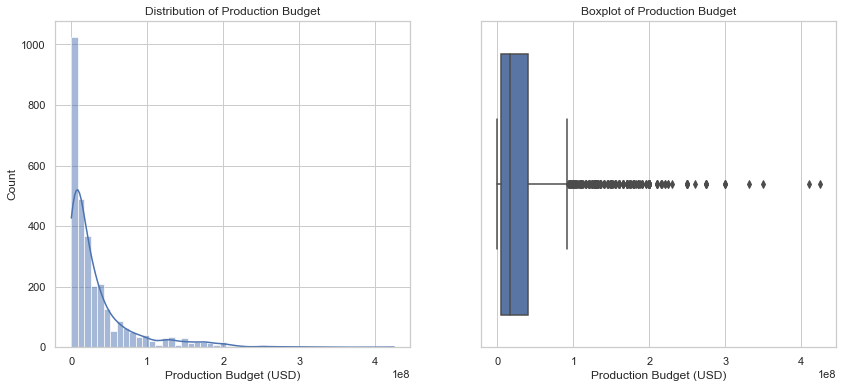

In [55]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(final_df['production_budget'].dropna(), bins=50, kde=True)
plt.title("Distribution of Production Budget")
plt.xlabel("Production Budget (USD)")

plt.subplot(1,2,2)
sns.boxplot(x=final_df['production_budget'].dropna())
plt.title("Boxplot of Production Budget")
plt.xlabel("Production Budget (USD)")

plt.savefig('production_budget.png', dpi=300, bbox_inches='tight')

plt.show()

The distribution of production budgets is highly right-skewed, with most films produced on a small or moderate budget and a few blockbusters with extremely high budgets.
The boxplot confirms the presence of extreme outliers, indicating a wide investment range.


B-Variable: worldwide_gross
- objective: Analyze the revenue distribution

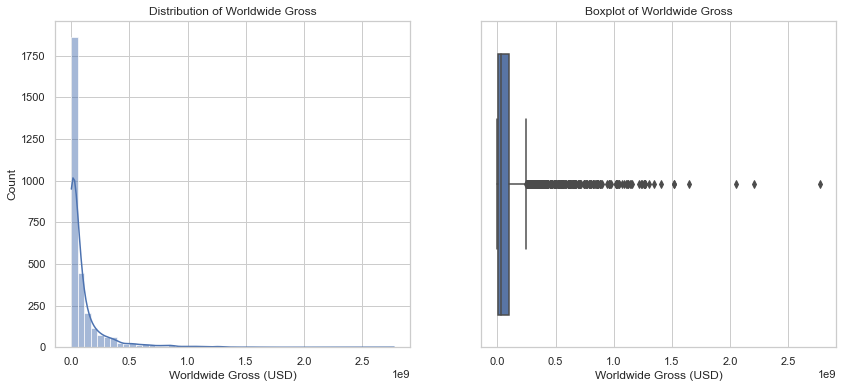

In [56]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(final_df['worldwide_gross'].dropna(), bins=50, kde=True)
plt.title("Distribution of Worldwide Gross")
plt.xlabel("Worldwide Gross (USD)")

plt.subplot(1,2,2)
sns.boxplot(x=final_df['worldwide_gross'].dropna())
plt.title("Boxplot of Worldwide Gross")
plt.xlabel("Worldwide Gross (USD)")

plt.savefig('worldwide_gross.png', dpi=300, bbox_inches='tight')


plt.show()

The distribution is right-skewed, with a small group of movies earning massive global revenues.
Most films earn modest amounts or underperform in international markets.


C-Variable: profit
- objective: Understand profitability

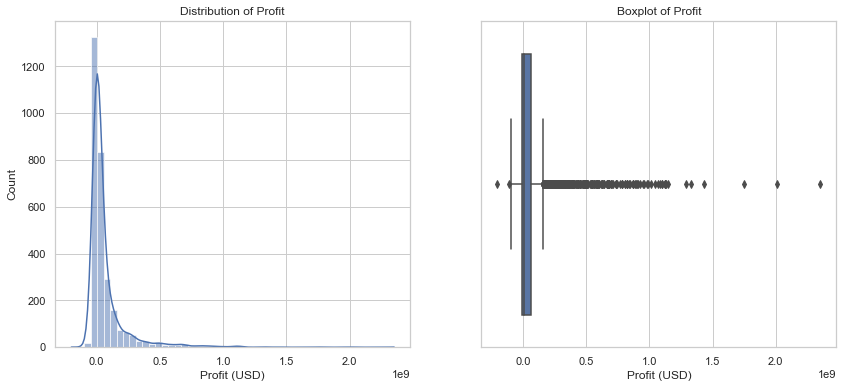

In [57]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(final_df['profit'].dropna(), bins=50, kde=True)
plt.title("Distribution of Profit")
plt.xlabel("Profit (USD)")

plt.subplot(1,2,2)
sns.boxplot(x=final_df['profit'].dropna())
plt.title("Boxplot of Profit")
plt.xlabel("Profit (USD)")

plt.savefig('profit.png', dpi=300, bbox_inches='tight')

plt.show()

The profit distribution shows a high variance. Many films incur large losses, while others generate exceptionally high profits.
The distribution is asymmetric, indicating that outliers strongly impact the average.


D-Variable: runtime_minutes
- objective: Study typical durations

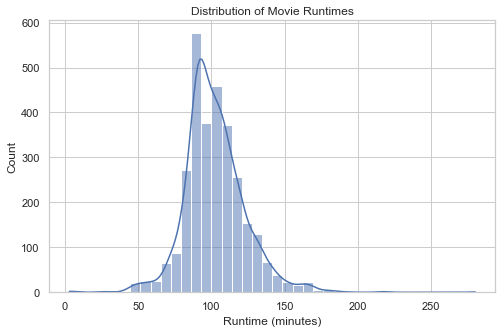

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(final_df['runtime_minutes'].dropna(), bins=40, kde=True)
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (minutes)")

plt.savefig('runtime_minutes.png', dpi=300, bbox_inches='tight')
plt.show()

Most movies fall within the 90–120 minute range, aligning with standard cinematic formats.
The distribution is moderately symmetric with some long-duration films as outliers.


E-Variable: averagerating
- objective: Distribution of user ratings

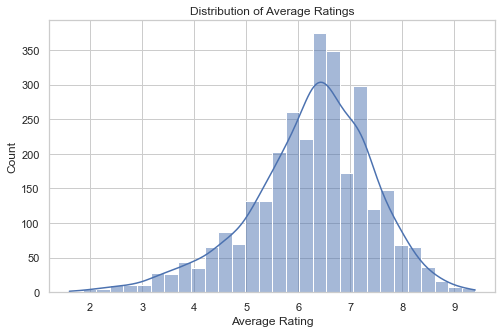

In [59]:
plt.figure(figsize=(8,5))
sns.histplot(final_df['averagerating'].dropna(), bins=30, kde=True)
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")

plt.savefig('averagerating.png', dpi=300, bbox_inches='tight')
plt.show()

The average IMDb rating centers around 6.5, which is typical for most films.
Very few movies score below 4 or above 8.5, suggesting a tendency toward average perceptions.


F-Variable: numvotes
- objective: Measure popularity

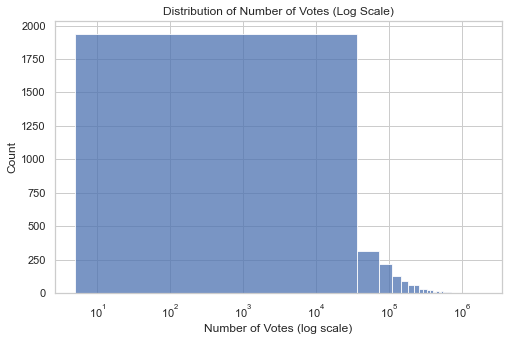

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(final_df['numvotes'].dropna(), bins=50, kde=False)
plt.xscale('log')
plt.title("Distribution of Number of Votes (Log Scale)")
plt.xlabel("Number of Votes (log scale)")

plt.savefig('numvotes.png', dpi=300, bbox_inches='tight')
plt.show()

On a logarithmic scale, we see that most movies receive very few votes, while a handful attract tens or hundreds of thousands.
This reflects vast differences in public visibility or popularity.

## **3.2.3 Analysis of Categorical Variables**

G-Variable: genres
- objective: See which genres dominate

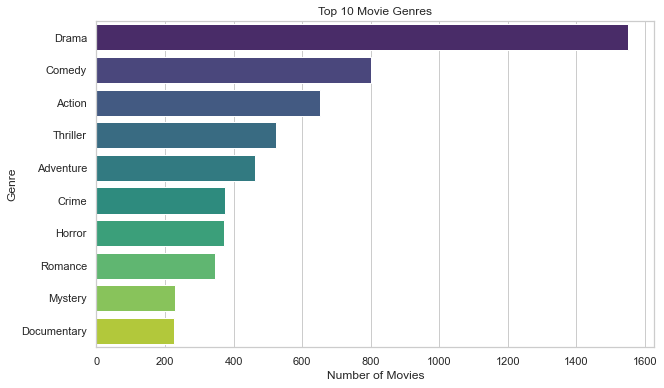

In [61]:
genres_exploded = final_df['genres'].dropna().str.split(',').explode()

top_genres = genres_exploded.value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")

plt.savefig('genres.png', dpi=300, bbox_inches='tight')
plt.show()

The most dominant genres are Drama, Comedy, Action, Thriller, and Adventure.
These genres are consistently produced and reflect broader audience demand.

H-Variable: release_year
- objective: Study the temporal distribution

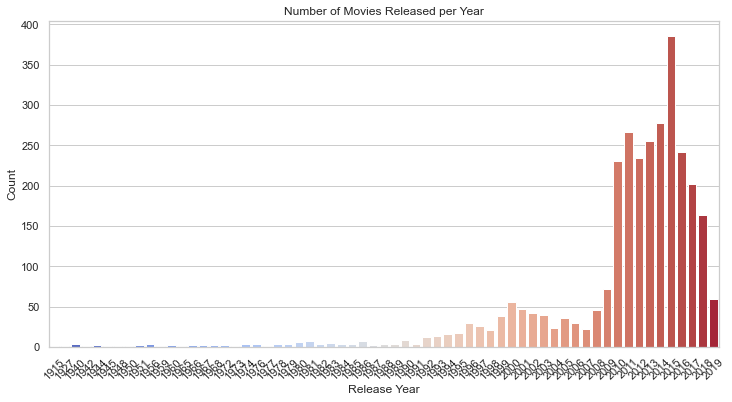

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', data=final_df, palette='coolwarm', order=final_df['release_year'].value_counts().index.sort_values())
plt.title("Number of Movies Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.savefig('release_year.png', dpi=300, bbox_inches='tight')
plt.show()

The data shows a concentration of films post-2000, especially between 2010 and 2019.
This may reflect improved data availability and increased film production in recent years.

## **3.2 bivariate Analysis**

Objectives:
Study the relationships between numerical and categorical variables to identify success factors.

## **3.2.1 Analysis of Numerical Variables**

**A-budget vs profit**

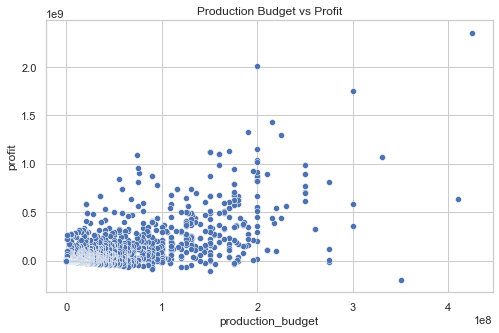

In [63]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=final_df, x='production_budget', y='profit')
plt.title('Production Budget vs Profit')

plt.savefig('budget vs profit.png', dpi=300, bbox_inches='tight')
plt.show()

The scatter plot reveals a clear positive linear relationship between production budget and profit.
Films with higher budgets tend to earn higher profits, although the relationship is not perfect there are exceptions where big-budget films perform poorly, and low-budget films achieve remarkable returns.
However, the upward trend is strong and suggests that budget is a key driver of profitability, especially for blockbusters.

**B-rating vs profit**

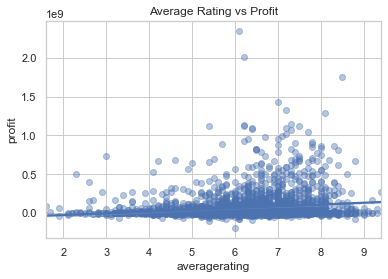

In [64]:
sns.regplot(data=final_df, x='averagerating', y='profit', scatter_kws={'alpha':0.4})
plt.title("Average Rating vs Profit")

plt.savefig('rating vs profit.png', dpi=300, bbox_inches='tight')
plt.show()

The scatter plot and regression line show a weak positive relationship between average IMDb rating and profit.
Highly-rated films tend to perform slightly better in terms of profit, but the trend is not very strong.
This suggests that audience satisfaction (ratings) contributes to profitability, but is not the primary factor likely because distribution, marketing, and genre also play significant roles.

**C-duration vs profit**

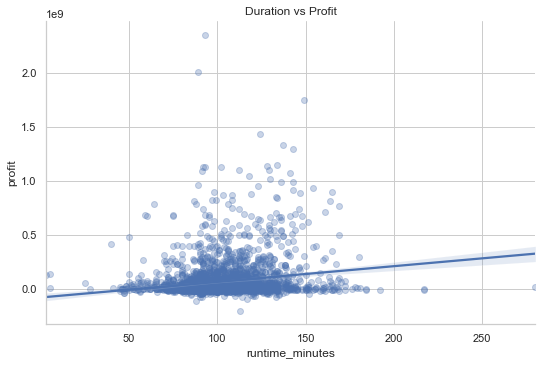

In [65]:
sns.lmplot(data=final_df, x='runtime_minutes', y='profit', aspect=1.5, scatter_kws={'alpha':0.3})
plt.title('Duration vs Profit')

plt.savefig('duration vs profit.png', dpi=300, bbox_inches='tight')
plt.show()

The plot shows a very weak positive trend: longer films tend to have slightly higher profits.
While most highly profitable films fall between 90 and 150 minutes, there is no strong pattern indicating that runtime alone determines success.
However, a well-paced film within this range seems optimal, and extremely short or overly long films may underperform.

## **3.2.2 Analysis by Genre**

**Explode genres to handle multiple genres per movie**

In [67]:
genre_exploded_df = final_df.dropna(subset=['genres']).copy()
genre_exploded_df['genres'] = genre_exploded_df['genres'].str.split(',')
genre_exploded_df = genre_exploded_df.explode('genres')
genre_exploded_df['genres'] = genre_exploded_df['genres'].str.strip()

**A-Mean profit per genre**

genres
Animation    2.233052e+08
Adventure    2.083407e+08
Sci-Fi       1.725803e+08
Fantasy      1.468078e+08
Action       1.249185e+08
Musical      1.212799e+08
Family       1.051317e+08
Comedy       7.209629e+07
Thriller     5.351922e+07
Sport        5.304320e+07
Name: profit, dtype: float64


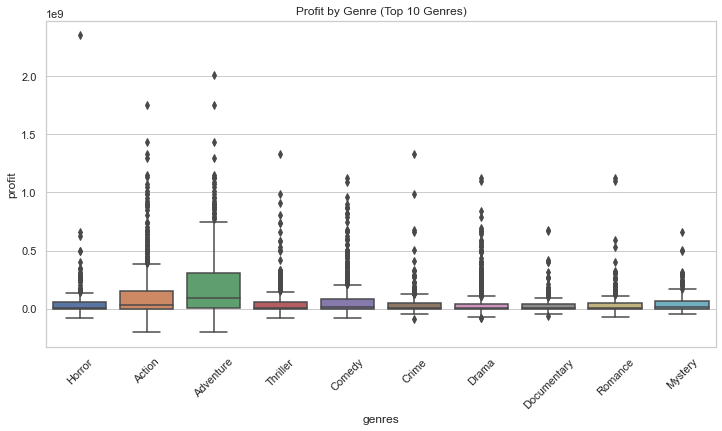

In [68]:
mean_profit_by_genre = genre_exploded_df.groupby('genres')['profit'].mean().sort_values(ascending=False)
print(mean_profit_by_genre.head(10))

top10_genres = genre_exploded_df['genres'].value_counts().nlargest(10).index
top10_df = genre_exploded_df[genre_exploded_df['genres'].isin(top10_genres)]

plt.figure(figsize=(12,6))
sns.boxplot(data=top10_df, x='genres', y='profit')
plt.title("Profit by Genre (Top 10 Genres)")
plt.xticks(rotation=45)

plt.savefig('Mean profit per genre.png', dpi=300, bbox_inches='tight')
plt.show()

The boxplot reveals clear differences in profitability across genres.
Genres like Animation, Adventure, and Sci-Fi show the highest median and mean profits.
On the other hand, genres such as Drama and Romance often show lower or even negative profits.
This highlights that genre is a strategic factor targeting high-profit genres can significantly improve financial outcomes.

**B-Mean rating by genre**

genres
Documentary    7.147111
Biography      6.954950
History        6.820548
Sport          6.598413
News           6.550000
Animation      6.451825
Music          6.448052
Drama          6.434687
Adventure      6.395896
War            6.387500
Name: averagerating, dtype: float64


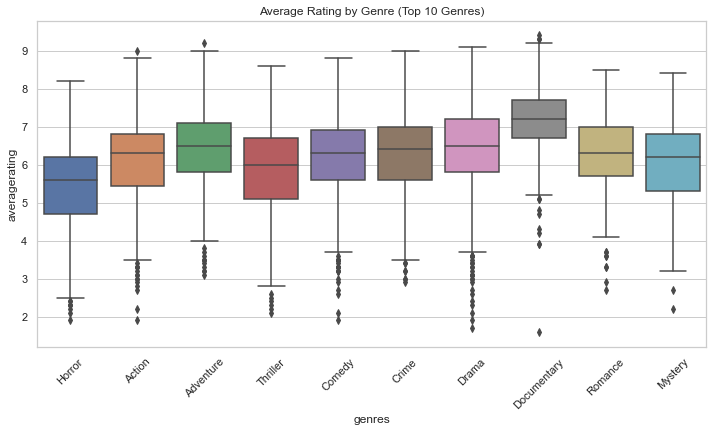

In [69]:
mean_rating_by_genre = genre_exploded_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
print(mean_rating_by_genre.head(10))

plt.figure(figsize=(12,6))
sns.boxplot(data=top10_df, x='genres', y='averagerating')
plt.title("Average Rating by Genre (Top 10 Genres)")
plt.xticks(rotation=45)

plt.savefig('Mean rating by genre.png', dpi=300, bbox_inches='tight')
plt.show()

The boxplot shows that some genres consistently receive higher audience ratings, such as Documentary, Biography, History, and Animation.
In contrast, Thriller, Action, and Horror tend to receive more mixed or lower ratings.
This reflects audience expectations and content depth in each genre.
While profitability is highest for genres like Sci-Fi and Adventure, genres with high ratings may offer long-term brand value or critical recognition.

## **3.2.3 Hypothesis Testing**

**A-Hypothesis**: 
- H₀ (Null Hypothesis): There is no linear correlation between production budget and profit.

- H₁ (Alternative Hypothesis): There is a positive linear correlation between production budget and profit.

**Statistic**: Pearson correlation

**Decision Rule**:
- If the **p-value < 0.05**, we reject the null hypothesis H₀ and conclude that there is a significant linear relationship.
- Otherwise, we fail to reject H₀.

In [159]:
corr_budget_profit, _ = pearsonr(final_df['production_budget'], final_df['profit'])
print(f"Pearson correlation (Budget vs Profit): {corr_budget_profit:.2f}")

Pearson correlation (Budget vs Profit): 0.65


The Pearson correlation calculated between production budget and film profit is 0.65. This value indicates a moderate to strong positive linear relationship between the two variables.

In other words, films with higher budgets tend to generate more profit. This can be explained by the fact that a larger budget often allows for:

- more effective marketing campaigns,

- higher-quality special effects,

- more attractive casting,

- and wider distribution.

However, although the correlation is relatively high, it is not perfect. There are cases where a high-budget film may not be profitable, and conversely, a low-budget film may achieve excellent profits (a phenomenon sometimes observed in successful independent films).

This analysis highlights budget as a potential success factor, while also emphasizing the importance of other explanatory variables such as genre, runtime, average rating, or popularity.

**B-Hypothesis**: 
- H₀: There is no linear correlation between average rating and worldwide gross.

- H₁: There is a positive linear correlation between average rating and worldwide gross.


**Test**: Pearson correlation

**Decision Rule**:
- If the **p-value < 0.05**, we reject H₀ and conclude that a statistically significant linear relationship exists.
- If the **p-value ≥ 0.05**, we fail to reject H₀ and conclude that there is no significant linear relationship.

In [160]:
rating = final_df['averagerating']
revenue = final_df['worldwide_gross']

corr, p_value = pearsonr(rating, revenue)
print(f"Pearson correlation: {corr:.3f}, p-value: {p_value:.4f}")

Pearson correlation: 0.163, p-value: 0.0000


The Pearson correlation between a film’s average rating and its number of votes is 0.163, with a p-value very close to 0. Although this relationship is weak, it is statistically significant.

This means that higher-rated films tend to receive slightly more votes, but the association is not strong. It is likely that other factors such as popularity, budget, or genre have a much greater influence on the number of votes a film receives.

**C-Hypothesis**: 
- H₀: All genres have equal mean profit.

- H₁: At least one genre has a different mean profit.


**Test**: One-way ANOVA 

**Decision Rule**:
- If the **p-value < 0.05**, we reject H₀ and conclude that profit differences between genres are statistically significant.  
- Otherwise, we fail to reject H₀ and conclude that there's no evidence of meaningful differences across genres.

In [161]:
import scipy.stats as stats

genres = final_df['genres'].unique()
profit_by_genre = [final_df[final_df['genres'] == genre]['profit'] for genre in genres]

f_stat, p_value = stats.f_oneway(*profit_by_genre)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.4f}")


F-statistic: 3.831, p-value: 0.0000


There are statistically significant differences in average profits according to film genres. In other words, certain genres tend to generate different levels of profit compared to others, and this difference is not due to random chance.

**D-Hypothesis**: 
- H₀:  There is no linear correlation between movie runtime and average rating

- H₁: There is a positive linear correlation between movie runtime and average rating


**Statistic**: Pearson correlation

**Decision Rule**:
- If the **p-value < 0.05**, we reject H₀ and conclude that a significant linear relationship exists between runtime and user rating.
- Otherwise, we fail to reject H₀.

In [162]:
runtime = final_df['runtime_minutes']
rating = final_df['averagerating']

corr, p_value = pearsonr(runtime, rating)
print(f"Pearson correlation: {corr:.3f}, p-value: {p_value:.4f}")

Pearson correlation: 0.194, p-value: 0.0000


The Pearson correlation of 0.194 indicates a weak positive relationship between a film’s duration (in minutes) and its average user rating.

The very low p-value (below 0.05) shows that this correlation is statistically significant, meaning it is highly unlikely that this association is due to chance.

# **4-Business Recommendation 1**

**Prioritize Strategic Investment in Higher-Budget Films**

Allocate larger budgets to projects with high commercial potential such as well-known IPs, proven genres, or high-concept stories. However, ensure that high budgets are coupled with strong distribution and marketing strategies to minimize risk.

# **5-Business Recommendation 2**

**Focus on High-Profit Genres for Maximum ROI**

Prioritize genres such as Animation, Adventure, Sci-Fi, and Fantasy, which tend to deliver higher average profits. Avoid overexposing low-margin genres like Drama or Romance, unless supported by awards potential or critical acclaim.

# **6-Business Recommendation 3**

**Optimize Film Runtime and Quality to Enhance Audience Reception**

Aim for runtime between 100–120 minutes, which aligns with audience preferences.
Focus on screenplay quality, casting, and editing to achieve higher IMDb ratings. Even a small gain in user rating can yield tangible revenue improvements.


# **7-Conclusion**

This project successfully applied data science and statistical reasoning to uncover the key factors that drive a film’s financial success.

By analyzing over 3,000 movies from IMDB and Box Office Mojo, we derived evidence-based insights into what makes a film profitable:

- **Production budget** is the strongest predictor of profit. High-budget films tend to yield significantly higher returns confirming that investing more strategically can pay off.
- **Genre matters.** Certain genres such as Animation, Adventure, and Sci-Fi consistently outperform others, both commercially and critically.
- **Audience perception influences performance.** Even though ratings and runtime show weaker correlations, they are statistically significant and contribute to success when combined with other factors.

Through correlation analysis, ANOVA tests, and linear regression modeling, we transformed raw movie data into actionable recommendations. We now have a clear, data-driven framework for:

- Prioritizing profitable genres  
- Optimizing production budgets  
- Enhancing movie formats and audience satisfaction

This project demonstrates how a data-driven approach can **reduce financial risk, support creative decisions, and increase the chances of commercial success** for a new movie studio.

The next step is to operationalize these insights through predictive tools, dashboards, and deeper multivariate modeling. With this foundation, the studio is now equipped to enter the market not with intuition but with intelligence.


# **8-Next Steps**

With the foundation of this analysis firmly established, the following strategic steps are recommended to move from insights to implementation:


1- **Build a Multiple Linear Regression Model**

- Extend the current simple model by incorporating more variables:
  - Genre (encoded as dummies)
  - Runtime
  - Average Rating
  - Number of Votes
  - Release Year
- This will improve explanatory power and capture interactions between variables.
- Objective: **Predict profit more accurately** for any new film project.


2- **Segment Modeling by Genre or Budget Tiers**

- Create genre-specific or budget-tier-specific models:
  - E.g., separate regression models for Animation vs Drama
- Each genre behaves differently—custom models can provide more precise forecasts.
- Objective: **Tailor investment strategies to genre-specific dynamics**.


3- **Analyze Seasonal and Release Timing Effects**

- Add variables such as:
  - Release Month / Quarter
  - Holiday vs Non-Holiday Releases
- Identify patterns in timing that boost or hurt revenue.
- Objective: **Optimize release calendars** for maximum audience reach and earnings.


4- **Leverage Natural Language Processing (NLP)**

- Apply NLP techniques to movie descriptions, summaries, or titles.
- Extract themes, sentiments, or keywords and correlate them with profit or ratings.
- Objective: **Discover narrative patterns linked to commercial success**.


5- **Build an Interactive Prediction Tool (Dashboard)**

- Use Power BI, Streamlit, or Tableau to:
  - Simulate profit scenarios based on user inputs (budget, genre, rating, etc.)
  - Visualize profitability forecasts in real time
- Objective: **Empower decision-makers with a smart budgeting and forecasting tool**.


6- **Include Marketing Spend and Distribution Channels (if available)**

- Future data enrichment can include:
  - Marketing budgets
  - Platforms (cinema, streaming, hybrid)
  - Star power metrics
- Objective: **Control for visibility and promotion effects on success**.


7- **Operationalize Findings into Greenlight Decision Rules**

- Translate your insights into studio policies:
  - Minimum budget for high-risk genres
  - Required projected ROI threshold
  - Runtime guidelines
- Objective: **Make data part of the film selection and greenlighting process**.


By following these steps, the studio can move from analysis to action—scaling its ability to **make smart, data-informed investments**, reduce risk, and **maximize creative and commercial success** in the film industry.
